In [1]:
import sys
print(sys.version)

3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 16:07:37) 
[GCC 9.3.0]


In [2]:
import time
import tqdm
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import json
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim 
import torch.utils.data as utils
import torch.nn.init as init
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
plt.style.use('default')

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
from preprocessor import load
from supervised import *
from four_vector_utils import *

In [5]:
X_train_htt,X_test_htt,Xalt_train_htt,Xalt_test_htt,Xevt_train_htt,Xevt_test_htt,Y_train_htt,Y_test_htt,feat_train_htt,feat_test_htt = load('/data/t3home000/spark/GluGluHToTauTau_user_0.z')

/data/t3home000/spark/MassRegression/preprocessor.py:114: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  h5File = h5py.File(iFile)


<HDF5 file "GluGluHToTauTau_user_0.z" (mode r+)>
[[289.75   110.125  125.     ...   0.       0.       1.    ]
 [207.875   84.6875 125.     ...   0.       0.       1.    ]
 [221.875   91.5    125.     ...   0.       0.       1.    ]
 ...
 [286.25    62.875  125.     ...   0.       0.       1.    ]
 [258.5     73.125  125.     ...   0.       0.       1.    ]
 [310.75    95.25   125.     ...   0.       0.       1.    ]]
(210492, 386)
sv_chi20 found nan!!
(210443, 300)
(210443, 30, 10)
(210443, 65)
(210443, 5, 13)
(210443, 12)


In [6]:
gen4vec = np.apply_along_axis(fourvec, 1, Y_train_htt)
jet4vec = np.apply_along_axis(fourvec, 1, Xevt_train_htt[:,-4:])

Y_train_htt = gen4vec - jet4vec


In [7]:
normlist_check = np.apply_along_axis(fourvec_norm, 1, Y_train_htt)


In [8]:
normlist_check

array([17.35819907, 13.90187909, 41.51033232, ..., 61.8070506 ,
       75.14978329, 31.16986747])

In [10]:
%matplotlib inline

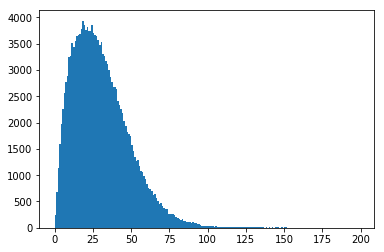

In [14]:
plt.hist(normlist_check,np.arange(0,200,1));

In [16]:
X_train_flat,X_test_flat,Xalt_train_flat,Xalt_test_flat,Xevt_train_flat,Xevt_test_flat,Y_train_flat,Y_test_flat,feat_train_flat,feat_test_flat = load('/data/t3home000/spark/FlatTauTau_user_0.z',maxevts=0)

<HDF5 file "FlatTauTau_user_0.z" (mode r+)>
[[4.42500000e+02 9.88281250e+00 2.97500000e+01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [4.39500000e+02 7.62939453e-06 3.23750000e+01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [8.06000000e+02 4.87500000e+01 6.37500000e+01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [1.24900000e+03 1.34250000e+02 1.72500000e+02 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.72000000e+02 5.80000000e+01 7.47500000e+01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [2.77500000e+02 2.66875000e+01 5.36250000e+01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]
(463459, 386)
(463296, 300)
(463296, 30, 10)
(463296, 65)
(463296, 5, 13)
(463296, 12)


In [20]:
wp_list = [0,0.2, 0.5, 0.8,.9]
wp_choice = 4
wp = wp_list[wp_choice]

In [21]:
X_train_split1, X_train_split2, Xalt_train_split1, Xalt_train_split2, Xevt_train_split1, Xevt_train_split2, y_train_split1, y_train_split2 = train_test_split(X_train_htt, Xalt_train_htt, Xevt_train_htt, Y_train_htt, test_size=wp, random_state=42)

In [22]:
mixratio = round(X_train_split1.shape[0]/(X_train_flat.shape[0]+X_train_split1.shape[0])*100)

In [23]:
mixratio

4

In [17]:
gen4vec = np.apply_along_axis(fourvec, 1, Y_train_flat)
jet4vec = np.apply_along_axis(fourvec, 1, Xevt_train_flat[:,-4:])

Y_train_flat = gen4vec - jet4vec

In [18]:
normlist_check2 = np.apply_along_axis(fourvec_norm, 1, Y_train_flat)


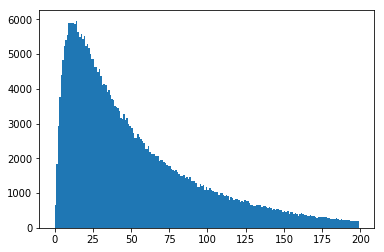

In [22]:
plt.hist(normlist_check2,bins=np.arange(0,200,1));

In [25]:
X_train = np.vstack((X_train_split1, X_train_flat))

Xalt_train = np.vstack((Xalt_train_split1, Xalt_train_flat))

Xevt_train = np.vstack((Xevt_train_split1, Xevt_train_flat))

In [26]:
X_train.shape

(387470, 30, 10)

In [27]:
Xalt_train.shape

(387470, 5, 13)

In [28]:
Xevt_train.shape

(387470, 12)

In [32]:
part_mean = np.mean(X_train, axis=0)
part_std = np.std(X_train, axis=0)

alt_mean = np.mean(Xalt_train, axis=0)
alt_std = np.std(Xalt_train, axis=0)

evt_mean = np.mean(Xevt_train, axis=0)
evt_std = np.std(Xevt_train, axis=0)

X_train = (X_train-part_mean)/part_std
Xalt_train = (Xalt_train-alt_mean)/alt_std
Xevt_train = (Xevt_train-evt_mean)/evt_std

In [33]:
y_train = np.concatenate((y_train_split1, Y_train_flat))

In [34]:
normlist = np.apply_along_axis(fourvec_norm, 1, y_train)


In [35]:
maxnorm = np.max(normlist)

In [36]:
maxnorm

587.5681455543696

In [37]:
y_train = y_train/maxnorm

In [38]:
X_val, X_test, Xalt_val, Xalt_test, Xevt_val, Xevt_test, y_val, y_test = train_test_split(X_test_htt, Xalt_test_htt, Xevt_test_htt, Y_test_htt, test_size=0.5, random_state=42)

In [39]:
y_val = (y_val/maxnorm)
y_test = (y_test/maxnorm)

In [41]:
X_test = (X_test-part_mean)/part_std
Xalt_test = (Xalt_test-alt_mean)/alt_std
Xevt_test = (Xevt_test-evt_mean)/evt_std

X_val = (X_val-part_mean)/part_std
Xalt_val = (Xalt_val-alt_mean)/alt_std
Xevt_val = (Xevt_val-evt_mean)/evt_std

In [42]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
torch.cuda.get_device_name(0)

cuda:0


'GeForce RTX 2080 Ti'

In [43]:
BATCH_SIZE = 500
N_EPOCHS = 80
PRINT_INTERVAL = 2000
NUM_WORKERS = 4
LR = 1e-4

In [44]:
model = SimpleGru()

print(model)
model.to(device)

SimpleGru(
  (gru1): GRU(10, 4, num_layers=2, batch_first=True, dropout=0.5)
  (gru2): GRU(13, 4, num_layers=2, batch_first=True, dropout=0.5)
  (linear1): Linear(in_features=20, out_features=40, bias=True)
  (linear2): Linear(in_features=40, out_features=20, bias=True)
  (linear3): Linear(in_features=20, out_features=10, bias=True)
  (linear4): Linear(in_features=10, out_features=8, bias=True)
  (linear5): Linear(in_features=8, out_features=4, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (batchnorm1): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm4): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


SimpleGru(
  (gru1): GRU(10, 4, num_layers=2, batch_first=True, dropout=0.5)
  (gru2): GRU(13, 4, num_layers=2, batch_first=True, dropout=0.5)
  (linear1): Linear(in_features=20, out_features=40, bias=True)
  (linear2): Linear(in_features=40, out_features=20, bias=True)
  (linear3): Linear(in_features=20, out_features=10, bias=True)
  (linear4): Linear(in_features=10, out_features=8, bias=True)
  (linear5): Linear(in_features=8, out_features=4, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (batchnorm1): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm4): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [45]:
train_data = gruTrainData(torch.FloatTensor(X_train.astype(np.float)),torch.FloatTensor(Xalt_train.astype(np.float)),torch.FloatTensor(Xevt_train.astype(np.float)),torch.FloatTensor(y_train.astype(np.float)))
val_data = gruTrainData(torch.FloatTensor(X_val.astype(np.float)),torch.FloatTensor(Xalt_val.astype(np.float)),torch.FloatTensor(Xevt_val.astype(np.float)),torch.FloatTensor(np.array(y_val).astype(np.float)))
test_data = gruTestData(torch.FloatTensor(X_test.astype(np.float)),torch.FloatTensor(Xalt_test.astype(np.float)),torch.FloatTensor(Xevt_test.astype(np.float))) 

In [46]:
train_loader = utils.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = utils.DataLoader(dataset=val_data, batch_size=100)
test_loader = utils.DataLoader(dataset=test_data, batch_size=100)

In [47]:
optimizer = optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.MSELoss()

In [48]:
def fourvec_loss(output, target):
    diff = output-target
    #print("diff:",diff.shape)
    norm = torch.dot(diff[:,0],diff[:,0])-torch.dot(diff[:,1],diff[:,1])-torch.dot(diff[:,2],diff[:,2])-torch.dot(diff[:,3],diff[:,3])
    #print("norm:",norm.shape)
    loss = torch.sqrt(torch.sqrt(norm*norm))
    return loss

In [49]:
def train():
    # set the train mode
    model.train()

    # loss of the epoch
    epoch_loss = 0
    epoch_acc = 0

    for x1,x2,x3, y in train_loader:
        # reshape the data into [batch_size, 784]
        x1,x2,x3,y = x1.to(device),x2.to(device),x3.to(device), y.to(device)

        # update the gradients to zero
        optimizer.zero_grad()

        # forward pass
        y_pred = model(x1,x2,x3)

        # reconstruction loss
        #recon_loss = F.binary_cross_entropy(x_sample, x, size_average=False)

        # kl divergence loss
        #kl_loss = 0.5 * torch.sum(torch.exp(z_var) + z_mu**2 - 1.0 - z_var)

        # total loss
        #loss = recon_loss + kl_loss

        #BCE loss
        #print(y_pred.shape, y.shape)
        loss = criterion(y_pred, y)
        
        # backward pass
        loss.backward()
        epoch_loss += loss.item()

        # update the weights
        optimizer.step()

    return epoch_loss

In [50]:
def test():
    # set the evaluation mode
    model.eval()

    # test loss for the data
    test_loss = 0

    # we don't need to track the gradients, since we are not updating the parameters during evaluation / testing
    with torch.no_grad():
        for x1,x2,x3, y in val_loader:
            # reshape the data
            #x = x.view(-1, 28 * 28)
            x1,x2,x3,y = x1.to(device),x2.to(device),x3.to(device), y.to(device)
            # forward pass
            y_pred = model(x1,x2,x3)

            loss = criterion(y_pred, y)
            # total loss
            
            test_loss += loss.item()

    return test_loss


In [51]:
mixratio

4

In [64]:
model.load_state_dict(torch.load(f"/data/t3home000/spark/MassRegression/weights/fourVec_GRU_{mixratio}_v1.h5"))

<All keys matched successfully>

In [63]:
optimizer = optim.Adam(model.parameters(), lr=1e-6)


In [65]:
best_test_loss = 0.0009
patience_counter = 0
for e in range(500):

    train_loss = train()
    test_loss = test()

    train_loss /= len(train_data)
    test_loss /= len(val_data)

    print(f'Epoch {e}, Train Loss: {train_loss:.7f}, Test Loss: {test_loss:.7f}')

    if best_test_loss > test_loss:
        best_test_loss = test_loss
        torch.save(model.state_dict(), f"/data/t3home000/spark/MassRegression/weights/fourVec_GRU_{mixratio}_v1.h5")
        patience_counter = 1
        print('saving model')
    else:
        print('NOT SAVING')
        patience_counter += 1

    if patience_counter > 100:
        print('patience limit reached')
        break

Epoch 0, Train Loss: 0.0008005, Test Loss: 0.0010057
NOT SAVING
Epoch 1, Train Loss: 0.0007971, Test Loss: 0.0010343
NOT SAVING
Epoch 2, Train Loss: 0.0007948, Test Loss: 0.0010184
NOT SAVING
Epoch 3, Train Loss: 0.0007903, Test Loss: 0.0010434
NOT SAVING
Epoch 4, Train Loss: 0.0007878, Test Loss: 0.0010497
NOT SAVING
Epoch 5, Train Loss: 0.0007835, Test Loss: 0.0010574
NOT SAVING
Epoch 6, Train Loss: 0.0007801, Test Loss: 0.0010785
NOT SAVING
Epoch 7, Train Loss: 0.0007770, Test Loss: 0.0010945
NOT SAVING
Epoch 8, Train Loss: 0.0007735, Test Loss: 0.0010902
NOT SAVING
Epoch 9, Train Loss: 0.0007710, Test Loss: 0.0011002
NOT SAVING
Epoch 10, Train Loss: 0.0007674, Test Loss: 0.0010728
NOT SAVING
Epoch 11, Train Loss: 0.0007642, Test Loss: 0.0011274
NOT SAVING
Epoch 12, Train Loss: 0.0007611, Test Loss: 0.0011165
NOT SAVING
Epoch 13, Train Loss: 0.0007579, Test Loss: 0.0011385
NOT SAVING
Epoch 14, Train Loss: 0.0007549, Test Loss: 0.0011431
NOT SAVING
Epoch 15, Train Loss: 0.0007524, Te

KeyboardInterrupt: 

In [66]:
model.eval()
y_pred_list = np.array([],dtype=np.float)
with torch.no_grad():
    for batch_idx, (x1,x2,x3) in enumerate(test_loader):
        x1 = x1.to(device)
        x2 = x2.to(device)
        x3 = x3.to(device)
        y_test_pred = model(x1,x2,x3)
        y_test_pred = y_test_pred.cpu().numpy()
        y_test_pred *= maxnorm
        xevt = x3.cpu().numpy()
        jet4vec = (xevt[:,-4:]*evt_std[-4:]) + evt_mean[-4:]
        reconstructed = jet4vec + y_test_pred
        #print(reconstructed.shape)
        mass = np.apply_along_axis(fourvec_norm, 1, reconstructed)
        
        #y_test_pred = torch.sigmoid(y_test_pred)
        #y_pred_tag = torch.round(y_test_pred)
        y_pred_list = np.append(y_pred_list,mass)

In [68]:
%matplotlib inline


In [ ]:
y_pred_list

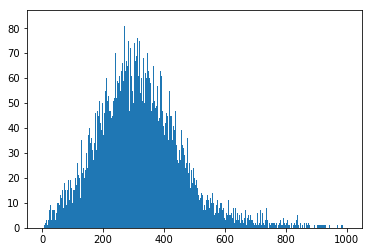

In [69]:
plt.hist(y_pred_list,np.arange(0,1000,1));

In [ ]:
mixratio

In [ ]:
n,b,patches = plt.hist(predicted_mass,np.arange(60,300,3))
plt.text(200, 1000, f'mean: {np.mean(predicted_mass):.2f}', fontsize=15)
plt.text(200, 800, f'std: {np.std(predicted_mass):.2f}', fontsize=15)

plt.text(200, 600, f'mixratio: {mixratio}%', fontsize=15)

plt.text(65, 1200, f'm={b[bin_max][0]}', fontsize=13)

plt.axvline(x=b[bin_max][0],color='r')
plt.savefig('hadhad_mixratio_11')

In [ ]:
bin_max = np.where(n == n.max())

In [ ]:
b[bin_max][0]

In [ ]:
relerr = (predicted_mass - 125) /125

In [ ]:
plt.hist(relerr,np.arange(-1.5,1.5,0.05));